# Medical Embeddings and clinical trial search engine

In [1]:
#  Importing Libraries

In [20]:
import streamlit as st  #importing streamlit liabrary

In [27]:
import pandas as pd
import numpy as np
import gensim
from gensim.models import Word2Vec
from gensim.models import FastText
from sklearn.decomposition import PCA
from matplotlib import pyplot

In [28]:
import matplotlib.pyplot as plt # our main display package
import plotly.graph_objects as go
import string # used for preprocessing
import re # used for preprocessing
import nltk # the Natural Language Toolkit, used for preprocessing
import numpy as np # used for managing NaNs
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords # used for preprocessing
from nltk.stem import WordNetLemmatizer # used for preprocessing
from sklearn.model_selection import train_test_split
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# Importing datasets 

In [29]:
df=pd.read_csv('Dimension-covid.csv')   #for preprocessing
df1=pd.read_csv('Dimension-covid.csv')  #for returning results

# Preprocessing data 

In [30]:
# understand the data

df.shape

(10666, 21)

In [31]:
# understand the data

df.head()

,Date added,Trial ID,Title,Brief title,Acronym,Abstract,Publication date,Active years,Phase,Conditions,...,Gender,Registry,Investigators/Contacts,Sponsors/Collaborators,GRID IDs,Country of Sponsor/Collaborator,Collaborating Funders,Funder Country,Source Linkout,Dimensions URL
0,2021-06-04,NCT04912934,The Relationship Between Coronavirus Anxiety L...,The Relationship Between COVID-19 Anxiety Leve...,COVID-19,The aim was to determine the coronavirus anxie...,2020-06-20,2020,NaN,COVID-19; Emotional Eating; Metabolic Syndrome,...,All,ClinicalTrials.gov,Dilek Küçük Alemdar,Ordu University,grid.412366.4,Turkey,NaN,NaN,https://clinicaltrials.gov/show/NCT04912934,https://app.dimensions.ai/details/clinical_tri...
1,2021-06-04,NCT04912921,Effect of Palmitoylethanolamide on Proinflamma...,Effect of Palmitoylethanolamide on Proinflamma...,NaN,This is a randomized controlled trial to exami...,2020-10-20,2020; 2021; 2022,NaN,COVID19; Inflammation,...,All,ClinicalTrials.gov,NaN,Arizona State University,grid.215654.1,United States,NaN,NaN,https://clinicaltrials.gov/show/NCT04912921,https://app.dimensions.ai/details/clinical_tri...
2,2021-06-04,NCT04912895,Detection of SARS-CoV-2 RNA and Biomarkers in ...,Detection of SARS-CoV-2 RNA in Coughed Droplet...,NaN,The purpose of this study is to learn how to b...,2021-04-14,2021; 2022,NaN,Covid19,...,All,ClinicalTrials.gov,Larry Anderson,Emory University Hospital Midtown; Emory Unive...,grid.411929.6; grid.412162.2; grid.189967.8; g...,United States; United States; United States; U...,NaN,NaN,https://clinicaltrials.gov/show/NCT04912895,https://app.dimensions.ai/details/clinical_tri...
3,2021-06-04,NCT04912817,Pain Rehabilitation Virtual Reality (PR-VR) At...,PR-VR At-home Program During and After COVID-19,NaN,Poorly controlled chronic pain in teens can im...,2021-09-01,2021; 2022,NaN,"Pain, Chronic",...,All,ClinicalTrials.gov,Jennifer Stinson,Hospital for Sick Children; Stanford University,grid.42327.30; grid.168010.e,Canada; United States,Hospital for Sick Children,Canada,https://clinicaltrials.gov/show/NCT04912817,https://app.dimensions.ai/details/clinical_tri...
4,2021-06-04,NCT04912804,Perceived Health After Hospitalization for COV...,Perceived Health After Hospitalization for COV...,PRO-COVID,There are currently no precise data available ...,2020-06-30,2020; 2021,NaN,"COVID-19, Post-hospitalization, Disease Impact",...,All,ClinicalTrials.gov,NaN,Centre Hospitalier Universitaire Dijon Bourgogne,grid.31151.37,France,NaN,NaN,https://clinicaltrials.gov/show/NCT04912804,https://app.dimensions.ai/details/clinical_tri...


In [32]:
df['Abstract'][0]

'The aim was to determine the coronavirus anxiety levels and emotional eating status of cases with diagnosis of MetS according to diagnostic criteria published by the International Diabetic Federation (IDF) in 2005 and healthy individuals with similar BMI to MetS subjects.\n\nDetailed Description\nThe aim was to determine the coronavirus anxiety levels and emotional eating status of cases with diagnosis of MetS according to diagnostic criteria published by the International Diabetic Federation (IDF) in 2005 and healthy individuals with similar BMI to MetS subjects. This study was completed with the descriptive, cross-sectional and relational screening model. The full sampling method was used in the study. The study was completed with 105 individuals with metabolic syndrome attending the diet clinic and 109 healthy individuals without MetS diagnosis also attending the diet clinic. Collection of data used anthropometric measurements and biochemical findings, blood pressure and a survey f

In [33]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
# function to remove all urls
def remove_urls(text):    
    new_text = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",text).split())
    return new_text

# make all text lowercase
def text_lowercase(text):
    return text.lower()

# remove numbers
def remove_numbers(text):
    result = re.sub(r'\d+', '', text)
    return result

# remove punctuation
def remove_punctuation(text):
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

# tokenize
def tokenize(text):
    text = word_tokenize(text)
    return text

# remove stopwords
stop_words = set(stopwords.words('english'))
def remove_stopwords(text):
    text = [i for i in text if not i in stop_words]
    return text

# lemmatize Words 
lemmatizer = WordNetLemmatizer()
def lemmatize(text):
    text = [lemmatizer.lemmatize(token) for token in text]
    return text

#Creating one function so that all functions can be applied at once
def preprocessing(text):
    
    text = text_lowercase(text)
    text = remove_urls(text)
    text = remove_numbers(text)
    text = remove_punctuation(text)
    text = tokenize(text)
    text = remove_stopwords(text)
    text = lemmatize(text)
    text = ' '.join(text)
    return text

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [34]:
#Applying preprocessing and removing '\n' character

for i in range(df.shape[0]):
    df['Abstract'][i]=preprocessing(str(df['Abstract'][i])) 
for text in df.Abstract:

    text=text.replace('\n',' ')    

In [35]:
df.head()

,Date added,Trial ID,Title,Brief title,Acronym,Abstract,Publication date,Active years,Phase,Conditions,...,Gender,Registry,Investigators/Contacts,Sponsors/Collaborators,GRID IDs,Country of Sponsor/Collaborator,Collaborating Funders,Funder Country,Source Linkout,Dimensions URL
0,2021-06-04,NCT04912934,The Relationship Between Coronavirus Anxiety L...,The Relationship Between COVID-19 Anxiety Leve...,COVID-19,aim determine coronavirus anxiety level emotio...,2020-06-20,2020,NaN,COVID-19; Emotional Eating; Metabolic Syndrome,...,All,ClinicalTrials.gov,Dilek Küçük Alemdar,Ordu University,grid.412366.4,Turkey,NaN,NaN,https://clinicaltrials.gov/show/NCT04912934,https://app.dimensions.ai/details/clinical_tri...
1,2021-06-04,NCT04912921,Effect of Palmitoylethanolamide on Proinflamma...,Effect of Palmitoylethanolamide on Proinflamma...,NaN,randomized controlled trial examine effect foo...,2020-10-20,2020; 2021; 2022,NaN,COVID19; Inflammation,...,All,ClinicalTrials.gov,NaN,Arizona State University,grid.215654.1,United States,NaN,NaN,https://clinicaltrials.gov/show/NCT04912921,https://app.dimensions.ai/details/clinical_tri...
2,2021-06-04,NCT04912895,Detection of SARS-CoV-2 RNA and Biomarkers in ...,Detection of SARS-CoV-2 RNA in Coughed Droplet...,NaN,purpose study learn better detect infection un...,2021-04-14,2021; 2022,NaN,Covid19,...,All,ClinicalTrials.gov,Larry Anderson,Emory University Hospital Midtown; Emory Unive...,grid.411929.6; grid.412162.2; grid.189967.8; g...,United States; United States; United States; U...,NaN,NaN,https://clinicaltrials.gov/show/NCT04912895,https://app.dimensions.ai/details/clinical_tri...
3,2021-06-04,NCT04912817,Pain Rehabilitation Virtual Reality (PR-VR) At...,PR-VR At-home Program During and After COVID-19,NaN,poorly controlled chronic pain teen impact qua...,2021-09-01,2021; 2022,NaN,"Pain, Chronic",...,All,ClinicalTrials.gov,Jennifer Stinson,Hospital for Sick Children; Stanford University,grid.42327.30; grid.168010.e,Canada; United States,Hospital for Sick Children,Canada,https://clinicaltrials.gov/show/NCT04912817,https://app.dimensions.ai/details/clinical_tri...
4,2021-06-04,NCT04912804,Perceived Health After Hospitalization for COV...,Perceived Health After Hospitalization for COV...,PRO-COVID,currently precise data available impact covid ...,2020-06-30,2020; 2021,NaN,"COVID-19, Post-hospitalization, Disease Impact",...,All,ClinicalTrials.gov,NaN,Centre Hospitalier Universitaire Dijon Bourgogne,grid.31151.37,France,NaN,NaN,https://clinicaltrials.gov/show/NCT04912804,https://app.dimensions.ai/details/clinical_tri...


In [36]:
df['Abstract'][0]

'aim determine coronavirus anxiety level emotional eating status case diagnosis mets according diagnostic criterion published international diabetic federation idf healthy individual similar bmi mets subject detailed description aim determine coronavirus anxiety level emotional eating status case diagnosis mets according diagnostic criterion published international diabetic federation idf healthy individual similar bmi mets subject study completed descriptive cross sectional relational screening model full sampling method used study study completed individual metabolic syndrome attending diet clinic healthy individual without mets diagnosis also attending diet clinic collection data used anthropometric measurement biochemical finding blood pressure survey form coronavirus anxiety scale ca emotional eating scale ee'

In [37]:
#Applying preprocessing and removing '\n' character

for i in range(df.shape[0]):
    df['Title'][i]=preprocessing(str(df['Title'][i])) 
for text in df.Title:

    text=text.replace('\n',' ') 

In [38]:
x=[word_tokenize(word) for word in df.Abstract ]   #Tokenizing data for training purpose

# Exploratory data analysis

In [39]:
from collections import Counter
cnt = Counter()
for text in df["Abstract"].values:
    for word in text.split():
        cnt[word] += 1
        
cnt.most_common(10)  #top 10 common words

[('patient', 38457),
 ('covid', 38211),
 ('study', 31963),
 ('group', 12771),
 ('treatment', 12471),
 ('day', 12337),
 ('sars', 11600),
 ('cov', 11535),
 ('clinical', 11507),
 ('disease', 11395)]

In [16]:
!pip install wordcloud

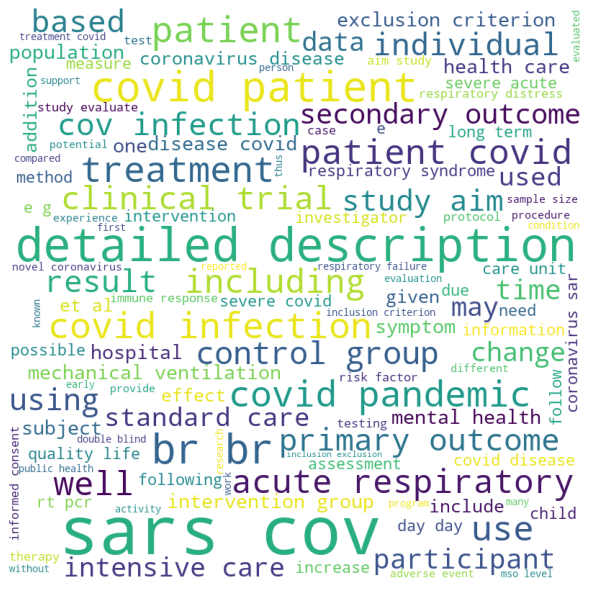

In [40]:
#Final word cloud after all the cleaning and pre-processing
from wordcloud import WordCloud
from textwrap import wrap
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
#comment_words = ' '
stopwords = set(STOPWORDS) 
from pandas.core.common import flatten

# iterate through the csv file 


comment_words=flatten(x)
comment_words=' '.join(comment_words)


wordcloud = WordCloud(width = 800, height = 800, 
            background_color ='white', 
            stopwords = stopwords, 
            min_font_size = 10).generate(comment_words) 

# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show() 

# Training skipgram model


In [41]:
# training the model

skipgram = Word2Vec(x, vector_size =50, window = 3, min_count=2,sg = 1)
print(skipgram)
skipgram.save('skipgramx1.bin')

2021-12-25 14:25:46.751 INFO    gensim.models.word2vec: collecting all words and their counts
2021-12-25 14:25:46.751 INFO    gensim.models.word2vec: PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2021-12-25 14:25:47.609 INFO    gensim.models.word2vec: PROGRESS: at sentence #10000, processed 2024809 words, keeping 39392 word types
2021-12-25 14:25:47.643 INFO    gensim.models.word2vec: collected 39969 word types from a corpus of 2088009 raw words and 10666 sentences
2021-12-25 14:25:47.659 INFO    gensim.models.word2vec: Creating a fresh vocabulary
2021-12-25 14:25:48.007 INFO    gensim.utils: Word2Vec lifecycle event {'msg': 'effective_min_count=2 retains 24877 unique words (62.2407365708424%% of original 39969, drops 15092)', 'datetime': '2021-12-25T14:25:48.007292', 'gensim': '4.1.2', 'python': '3.8.8 (default, Apr 13 2021, 15:08:03) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.19041-SP0', 'event': 'prepare_vocab'}
2021-12-25 14:25:48.007 INFO    gen

2021-12-25 14:26:23.731 INFO    gensim.models.word2vec: EPOCH 3 - PROGRESS: at 68.24% examples, 148545 words/s, in_qsize 5, out_qsize 0
2021-12-25 14:26:24.745 INFO    gensim.models.word2vec: EPOCH 3 - PROGRESS: at 75.62% examples, 148680 words/s, in_qsize 5, out_qsize 0
2021-12-25 14:26:25.808 INFO    gensim.models.word2vec: EPOCH 3 - PROGRESS: at 84.38% examples, 149042 words/s, in_qsize 5, out_qsize 0
2021-12-25 14:26:26.825 INFO    gensim.models.word2vec: EPOCH 3 - PROGRESS: at 94.84% examples, 148324 words/s, in_qsize 5, out_qsize 0
2021-12-25 14:26:27.152 INFO    gensim.models.word2vec: worker thread finished; awaiting finish of 2 more threads
2021-12-25 14:26:27.163 INFO    gensim.models.word2vec: worker thread finished; awaiting finish of 1 more threads
2021-12-25 14:26:27.214 INFO    gensim.models.word2vec: worker thread finished; awaiting finish of 0 more threads
2021-12-25 14:26:27.222 INFO    gensim.models.word2vec: EPOCH - 3 : training on 2088009 raw words (1928506 effecti

Word2Vec(vocab=24877, vector_size=50, alpha=0.025)


In [42]:
# training the model

skipgram = Word2Vec(x, vector_size =100, window = 1, min_count=2,sg = 1)
print(skipgram)
skipgram.save('skipgramx11.bin')

2021-12-25 14:27:50.627 INFO    gensim.models.word2vec: collecting all words and their counts
2021-12-25 14:27:50.627 INFO    gensim.models.word2vec: PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2021-12-25 14:27:51.571 INFO    gensim.models.word2vec: PROGRESS: at sentence #10000, processed 2024809 words, keeping 39392 word types
2021-12-25 14:27:51.601 INFO    gensim.models.word2vec: collected 39969 word types from a corpus of 2088009 raw words and 10666 sentences
2021-12-25 14:27:51.601 INFO    gensim.models.word2vec: Creating a fresh vocabulary
2021-12-25 14:27:51.970 INFO    gensim.utils: Word2Vec lifecycle event {'msg': 'effective_min_count=2 retains 24877 unique words (62.2407365708424%% of original 39969, drops 15092)', 'datetime': '2021-12-25T14:27:51.970500', 'gensim': '4.1.2', 'python': '3.8.8 (default, Apr 13 2021, 15:08:03) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.19041-SP0', 'event': 'prepare_vocab'}
2021-12-25 14:27:51.978 INFO    gen

2021-12-25 14:28:22.996 INFO    gensim.models.word2vec: EPOCH 5 - PROGRESS: at 13.98% examples, 289907 words/s, in_qsize 5, out_qsize 0
2021-12-25 14:28:24.009 INFO    gensim.models.word2vec: EPOCH 5 - PROGRESS: at 28.96% examples, 296434 words/s, in_qsize 6, out_qsize 0
2021-12-25 14:28:25.065 INFO    gensim.models.word2vec: EPOCH 5 - PROGRESS: at 41.74% examples, 282824 words/s, in_qsize 6, out_qsize 0
2021-12-25 14:28:26.118 INFO    gensim.models.word2vec: EPOCH 5 - PROGRESS: at 56.35% examples, 281166 words/s, in_qsize 6, out_qsize 1
2021-12-25 14:28:27.104 INFO    gensim.models.word2vec: EPOCH 5 - PROGRESS: at 71.40% examples, 286162 words/s, in_qsize 5, out_qsize 0
2021-12-25 14:28:28.118 INFO    gensim.models.word2vec: EPOCH 5 - PROGRESS: at 87.32% examples, 288735 words/s, in_qsize 5, out_qsize 0
2021-12-25 14:28:28.570 INFO    gensim.models.word2vec: worker thread finished; awaiting finish of 2 more threads
2021-12-25 14:28:28.580 INFO    gensim.models.word2vec: worker thread 

Word2Vec(vocab=24877, vector_size=100, alpha=0.025)


In [43]:
# Loading the model
skipgram = Word2Vec.load('skipgramx11.bin')

2021-12-25 14:29:34.930 INFO    gensim.utils: loading Word2Vec object from skipgramx11.bin
2021-12-25 14:29:34.975 INFO    gensim.utils: loading wv recursively from skipgramx11.bin.wv.* with mmap=None
2021-12-25 14:29:34.975 INFO    gensim.utils: setting ignored attribute cum_table to None
2021-12-25 14:29:35.668 INFO    gensim.utils: Word2Vec lifecycle event {'fname': 'skipgramx11.bin', 'datetime': '2021-12-25T14:29:35.668948', 'gensim': '4.1.2', 'python': '3.8.8 (default, Apr 13 2021, 15:08:03) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.19041-SP0', 'event': 'loaded'}


# Training Fasttext model

In [20]:
#fast_n= FastText(x,vector_size=200, window=3, min_count=2, workers=5, min_n=1, max_n=2,sg=1)  #training fasttext Model, with skipgram
#fast_n=fast_n.save('fast_p.bin')    #Saving our model
fast_n = Word2Vec.load('fast_p.bin')  #Loading our pretrained model


2021-10-01 15:14:43.320 INFO    gensim.utils: loading Word2Vec object from fast_p.bin


FileNotFoundError: [Errno 2] No such file or directory: 'fast_p.bin'

In [44]:
FastText=FastText(x,vector_size=100, window=2, min_count=2, workers=5, min_n=1, max_n=2,sg=1)
FastText.save('FastText.bin')    #Saving our model
FastText = Word2Vec.load('FastText.bin')  #Loading our pretrained model

2021-12-25 14:30:12.389 INFO    gensim.models.word2vec: collecting all words and their counts
2021-12-25 14:30:12.389 INFO    gensim.models.word2vec: PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2021-12-25 14:30:13.264 INFO    gensim.models.word2vec: PROGRESS: at sentence #10000, processed 2024809 words, keeping 39392 word types
2021-12-25 14:30:13.296 INFO    gensim.models.word2vec: collected 39969 word types from a corpus of 2088009 raw words and 10666 sentences
2021-12-25 14:30:13.296 INFO    gensim.models.word2vec: Creating a fresh vocabulary
2021-12-25 14:30:13.635 INFO    gensim.utils: FastText lifecycle event {'msg': 'effective_min_count=2 retains 24877 unique words (62.2407365708424%% of original 39969, drops 15092)', 'datetime': '2021-12-25T14:30:13.635078', 'gensim': '4.1.2', 'python': '3.8.8 (default, Apr 13 2021, 15:08:03) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.19041-SP0', 'event': 'prepare_vocab'}
2021-12-25 14:30:13.635 INFO    gen

2021-12-25 14:30:58.022 INFO    gensim.models.word2vec: EPOCH 2 - PROGRESS: at 64.11% examples, 90240 words/s, in_qsize 9, out_qsize 0
2021-12-25 14:30:59.045 INFO    gensim.models.word2vec: EPOCH 2 - PROGRESS: at 70.50% examples, 92335 words/s, in_qsize 9, out_qsize 0
2021-12-25 14:31:00.417 INFO    gensim.models.word2vec: EPOCH 2 - PROGRESS: at 75.24% examples, 90667 words/s, in_qsize 9, out_qsize 0
2021-12-25 14:31:01.431 INFO    gensim.models.word2vec: EPOCH 2 - PROGRESS: at 80.45% examples, 91129 words/s, in_qsize 9, out_qsize 0
2021-12-25 14:31:02.778 INFO    gensim.models.word2vec: EPOCH 2 - PROGRESS: at 87.72% examples, 91211 words/s, in_qsize 10, out_qsize 1
2021-12-25 14:31:03.733 INFO    gensim.models.word2vec: worker thread finished; awaiting finish of 4 more threads
2021-12-25 14:31:03.743 INFO    gensim.models.word2vec: worker thread finished; awaiting finish of 3 more threads
2021-12-25 14:31:03.907 INFO    gensim.models.word2vec: EPOCH 2 - PROGRESS: at 99.52% examples, 

2021-12-25 14:31:49.232 INFO    gensim.models.word2vec: EPOCH 5 - PROGRESS: at 8.37% examples, 87096 words/s, in_qsize 9, out_qsize 0
2021-12-25 14:31:50.420 INFO    gensim.models.word2vec: EPOCH 5 - PROGRESS: at 13.09% examples, 86232 words/s, in_qsize 9, out_qsize 0
2021-12-25 14:31:51.443 INFO    gensim.models.word2vec: EPOCH 5 - PROGRESS: at 17.97% examples, 89106 words/s, in_qsize 10, out_qsize 0
2021-12-25 14:31:52.498 INFO    gensim.models.word2vec: EPOCH 5 - PROGRESS: at 23.05% examples, 90187 words/s, in_qsize 9, out_qsize 0
2021-12-25 14:31:53.521 INFO    gensim.models.word2vec: EPOCH 5 - PROGRESS: at 28.20% examples, 92659 words/s, in_qsize 9, out_qsize 0
2021-12-25 14:31:54.576 INFO    gensim.models.word2vec: EPOCH 5 - PROGRESS: at 32.23% examples, 91625 words/s, in_qsize 10, out_qsize 0
2021-12-25 14:31:55.671 INFO    gensim.models.word2vec: EPOCH 5 - PROGRESS: at 37.47% examples, 92456 words/s, in_qsize 9, out_qsize 0
2021-12-25 14:31:56.777 INFO    gensim.models.word2vec

## Model embeddings - Similarity

In [45]:
# Similar words - skipgram

skipgram.wv.most_similar(positive=['corona'],topn=10)

[('coronavirus', 0.7521416544914246),
 ('covid', 0.7030069231987),
 ('novelty', 0.6877147555351257),
 ('evd', 0.6857419013977051),
 ('crown', 0.6806529760360718),
 ('ebola', 0.676693856716156),
 ('declares', 0.6661040186882019),
 ('covd', 0.6602699160575867),
 ('virulent', 0.6591863632202148),
 ('coronovirus', 0.6588385701179504)]

In [46]:
skipgram.wv.most_similar(positive=['patient'],topn=10)

[('hospitalised', 0.7451823949813843),
 ('subject', 0.7414281368255615),
 ('participant', 0.7340492010116577),
 ('acutely', 0.7286749482154846),
 ('individual', 0.7275478839874268),
 ('moderately', 0.7207695245742798),
 ('recovering', 0.7102311253547668),
 ('survivor', 0.693023145198822),
 ('lymphocytopenia', 0.6913892030715942),
 ('pwcf', 0.6901299953460693)]

In [47]:
# Similar words - fasttext

FastText.wv.most_similar(positive=['lung'],topn=10)

[('lungiq', 0.7502119541168213),
 ('leung', 0.7404875755310059),
 ('pulmonary', 0.7016764879226685),
 ('silicovilung', 0.680030107498169),
 ('alveolus', 0.6796720623970032),
 ('sung', 0.679288923740387),
 ('blunting', 0.6752338409423828),
 ('ltigung', 0.6744295954704285),
 ('laung', 0.6698073148727417),
 ('lubricating', 0.6686317920684814)]

In [48]:
FastText.wv.most_similar(positive=['breathing'],topn=10)

[('rebreathing', 0.9154529571533203),
 ('breaching', 0.9149593710899353),
 ('breathe', 0.8946815729141235),
 ('breaking', 0.8821642398834229),
 ('breathed', 0.8723615407943726),
 ('bathing', 0.8678091764450073),
 ('breath', 0.8479844927787781),
 ('threatening', 0.835186779499054),
 ('babybreathe', 0.8342891335487366),
 ('sweating', 0.8294828534126282)]

# PCA Plot - Skipgram

In [49]:
X = skipgram.wv[skipgram.wv.index_to_key]    #stroing arrays of all words
pca = PCA(n_components=2)                    #applying PCA to convert data into two dimensions
result = pca.fit_transform(X)

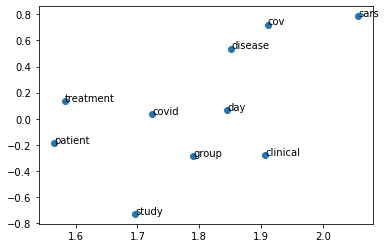

In [50]:
#words embeddings on the plot to check 2-D representation of each word
pyplot.scatter(result[:10, 0], result[:10, 1])
words = list(skipgram.wv.index_to_key)
for i, word in enumerate(words[:10]):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

# PCA Plot - Fasttest

In [51]:
#same thing as above but with fasttext model
X_fast = FastText.wv[FastText.wv.index_to_key]
pca = PCA(n_components=2)
result_fast = pca.fit_transform(X_fast)

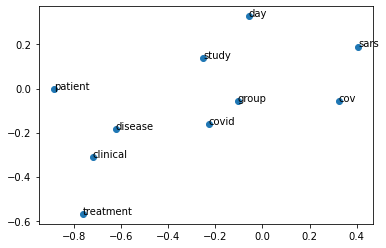

In [52]:
pyplot.scatter(result_fast[:10, 0], result_fast[:10, 1])
words = list(FastText.wv.index_to_key)
for i, word in enumerate(words[:10]):
    pyplot.annotate(word, xy=(result_fast[i, 0], result_fast[i, 1]))
pyplot.show()

# Getting Vectors for each abstract


In [53]:
vector_size=100   #defining vector size for each word

### Method 1

In [32]:
#function to take average of all vectors of each word in abstract, so that each abstract can represent (1,100) dimensional vector

K1=[]      #creating list to store vector representation of each abstract

for i in range(df.shape[0]):       #iterating through all abstract
    K=np.zeros([vector_size,1])    #creating empty array of size (vec_size,1) to add vector representation of each word
    count=0                        #creating count to check how many words are used from abstract
    
    for word in word_tokenize(df['Abstract'][i]):   #iterating through all words in given abstract

        if word in list(FastText.wv.index_to_key):      #if word exists in vocab , increase count by 1 and add array of given words in our defined array K

            count+=1
            K+=FastText.wv[word].reshape(vector_size,1)
    K=K/count                                        #taking average of given array
    K1.append(list(K))                               #appending vector of given abstract to the initial defined list
K1_array=np.array(K1)
K1_array=K1_array.reshape(df.shape[0],vector_size)   #converting into array of shape(no. of rows, vector_size)

In [33]:
# Method 1 will take time to run. Method 2 is prefered. 

### Method 2

In [54]:
def get_mean_vector(word2vec_model, words):
    # remove out-of-vocabulary words
    words = [word for word in tokenize(words) if word in list(word2vec_model.wv.index_to_key)] #if word is in vocab 
    if len(words) >= 1:
        return np.mean(word2vec_model.wv[words], axis=0)
    else:
        return np.array([0]*100)


### Abstract to vectors using skipgram Model

In [55]:
K1=[]                                     #defining empty list
for i in df.Abstract:
    K1.append(list(get_mean_vector(skipgram, i)))     #appending array to the list
    
    
K11=pd.DataFrame(K1).transpose()    # Saving vectors of each abstract in data frame so that we can use directly while running code again
K11.to_csv('skipgram-vec.csv')

In [56]:
K=pd.read_csv('skipgram-vec.csv')   #Loading our pretrained vectors of each abstract

skipgram_vectors=[]                          #transforming dataframe into required array like structure as we did in above step
for i in range(df.shape[0]):
    skipgram_vectors.append(K[str(i)].values)
 

### For converting Title into vectors using skipgram

In [65]:
K1_title=[]
for i in df.Title:         #instead of abstract use title
    K1_title.append(list(get_mean_vector(skipgram, i)))    

    
K1_title=pd.DataFrame(K1).transpose()    # Saving vectors of each abstract in data frame so that we can use directly while running code again
K1_title.to_csv('skipgram-vec-title.csv')    

In [66]:
K=pd.read_csv('skipgram-vec-title.csv')   #Loading our pretrained vectors of each abstract

K2_title=[]                          #transforming dataframe into required array like structure as we did in above step
for i in range(df.shape[0]):
    K2_title.append(K[str(i)].values)

### Abstract to vector using FastText 

In [57]:
K_fast=[]                                     #defining empty list
for i in df.Abstract:
    K_fast.append(list(get_mean_vector(FastText, i)))     #appending array to the list
    
K11=pd.DataFrame(K_fast).transpose()    # Saving vectors of each abstract in data frame so that we can use directly while running code again
K11.to_csv('FastText-vec.csv')

In [58]:
data=pd.read_csv('FastText-vec.csv')   #Loading our pretrained vectors of each abstract

fast_vectors=[]                          #transforming dataframe into required array like structure as we did in above step
for i in range(df.shape[0]):
    fast_vectors.append(data[str(i)].values)

# Cosine similarity function

In [59]:
#defining function to define cosine similarity

from numpy import dot
from numpy.linalg import norm

def cos_sim(a,b):

    return dot(a, b)/(norm(a)*norm(b)) 

# Input query Preprocessing

In [60]:
#Preprocessing input, because input should be in same form as training data set


def preprocessing_input(query,word2vec_model):
    query=preprocessing(query)
    query=query.replace('\n',' ')
    K=get_mean_vector(word2vec_model,query)
   
        
    return K   

# Function to return 'n' similar results

In [61]:
pd.set_option("display.max_colwidth", -1)       #this function will display full text from each column

<ipython-input-61-a25b7124b1bb>:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option("display.max_colwidth", -1)       #this function will display full text from each column


In [67]:
#function to return top n similar results

#query - input query
# p - average vectors for all abs
#df1 - original

def top_n(query,p,df1,model):    
    print(query)
    
    query=preprocessing_input(query,model)    #preprocessing input to list of vectors
                                    
    x=[]
    #Converting cosine similarities of overall data set with input queries into LIST
    for i in range(len(p)):
        x.append(cos_sim(query,p[i]))
    
    
 #store list in tmp to retrieve index
    tmp=list(x)
    
 #sort list so that largest elements are on the far right
    
    res = sorted(range(len(x)), key = lambda sub: x[sub])[-5:]
    sim=[tmp[i] for i in reversed(res)]
    print(sim)
 #get index of the 10 or n largest element
    L=[]
    for i in reversed(res):
    
        L.append(i)
    return df1.iloc[L, [1,2,5,6]],sim     #returning dataframe (only id,title,abstract ,publication date)

In [ ]:
#kidney
#breathing
#lung failure

## Result Evaluation

In [68]:
# skipgram model

#Input your search query here

Query = "lung failure"

Results,sim = top_n(Query,skipgram_vectors,df1,skipgram)
Results

lung failure
[0.8075499419395364, 0.8017223684984208, 0.7963855339495813, 0.794165254697142, 0.7831146024745974]


,Trial ID,Title,Abstract,Publication date
548,2021-000988-68,Immune response after covid-19 vaccination in patients with renal failure stadium 4 or 5 .,Renal failure stage 4 and 5.,2021-03-31
4235,NCT04597853,"Assessment of Lung Mechanics in SARS-CoV-2/ COVID-19 Acute Respiratory Distress Syndrome: A Holistic, Longitudinal Analysis of the Lung-heart-ventilator Interaction","This study is meant to assess the lung mechanics in SARS-CoV-2 induced acute respiratory failure. A precise characterisation of lung mechanics and heart-lung-interactions might allow a better understanding of SARS-CoV-2 induced acute respiratory failure and thus lead to better mechanical ventilation strategies. This monocentric, observational study of critically ill COVID-19 patients in the ICU, will employ impedance tomography, right-heart catheterization, oesophageal pressure measurements, indirect calorimetry as well as classic mechanical ventilation parameters to characterise the mechanical characteristics of the lung as well as the heart-lung interactions in SARS-CoV-2 induced acute respiratory failure.",2021-03-01
7831,2020-001807-18,"A Phase 2, Randomized, Double-Blind, Placebo-Controlled, Parallel-group, Multi-center Study of an Inhaled Pan-Janus Kinase Inhibitor, TD-0903, to Treat Symptomatic Acute Lung Injury Associated with COVID-19",Acute lung injury associated with COVID-19,2020-10-13
9785,2020-001236-10,"COUNTER-COVID - Oral imatinib to prevent pulmonary vascular leak in Covid19 a randomized, double --blind, placebo controlled, clinical trial in patients with severe Covid19 disease","Covid19 is characterized by hypoxemic respiratory failure, caused by extensive vascular leak and pulmonary edema early in the course of disease.",2020-12-10
10124,CHICTR2000030578,Clinical Prediction and Intervention of Pulmonary Function Impairment in Patients with Novel Coronavirus Pneumonia (COVID-19),"1. Establish a cohort of survivors of new coronavirus pneumonia, track their lung function damage and changes after discharge, and establish a predictive model of lung function impairment of new coronavirus pneumonia;\n2. Explore lung rehabilitation in patients with impaired lung function effect.",2020-02-01


In [69]:
# fasttext model

#Input your search query here

Query = "breathe"

Results,sim=top_n(Query,fast_vectors,df1,FastText)
Results

breathe
[0.770877864946895, 0.766797477661596, 0.7549373938047231, 0.7525385026190695, 0.7503035671090954]


,Trial ID,Title,Abstract,Publication date
3386,CHICTR2000040388,A prospective randomized control study comparing modified oropharyngeal airway with Guedel's airway for tracheal tube exchange and smooth extubation in gynecological laparoscopic surgery,"With the outbreak of COVID-19, extubation and cough in patients with perioperative intubation during recovery has become a more serious problem. Extubation under deep anesthesia can reduce the reflex of cough to a certain extent and reduce the spread of the epidemic.However, extubation under deep anesthesia may cause respiratory obstruction, and the placement of oropharyngeal airway after extubation can keep the pharynx unblocked and normal breathing.But the traditional oropharyngeal airway can induce restlessness, nausea, vomiting, coughing and even increased heart rate and blood pressure.\nIn this study, the hemodynamic fluctuation and choking were observed after the traditional oropharyngeal airway (OROPharyngeal airway) and the improved oropharyngeal airway (ORopharyngeal airway) were placed after extubation, so as to provide some evidences to support the extensive clinical application of such improved oropharyngeal airway (ORopharyngeal airway).",2020-11-01
3272,NCT04649931,Study to Evaluate Whether Differences in Exhaled Breath Can be Identified Using Ion Mobility Spectrometry (IMS) in Subjects Tested Positive for SARS-CoV-2 Infection and Subjects Tested Negative,Breath gas analysis is the evaluation of exhaled breath. It aims to evaluate the volatile organic compounds (VOCs) in exhaled breath. In this feasibility study it is intended to find specific peaks/pattern in exhaled breath indicating an infection with SARS-CoV-2 (severe acute respiratory syndrome coronavirus 2).,2020-12-14
678,2021-001144-98,The use of amantadine in the prevention of progression and treatment of COVID-19 symptoms in patients infected with the SARS-CoV-2 virus,"SARS-CoV-2 infection with one or more of the following symptoms: fever, cough, muscle aches, mild breathlessness, chest pain, diarrhea, nausea, vomiting, anosmia, lack of taste, sore throat, nasal congestion",2021-03-11
7249,NCT04411056,Time to Adapt in the Pandemic Era: A Prospective Randomized Study Comparing Time to Intubate With and Without the Barrier Box,This study is for patients who will be having surgery and will have a breathing tube placed during intubation. The purpose of the research is to study the time it takes to use a barrier box for placement of a breathing tube. A barrier box is a clear box that sits over the head and shoulders of a patient as a breathing tube is placed. The box is used to protect the healthcare provider's exposure to coronavirus in patients who have COVID-19. The study will not include patients who test positive for COVID-19 or who are sick with COVID-19 symptoms. The researchers want to learn how long it takes to use the barrier box before it is used routinely in COVID-19 patients.\n\nDetailed Description\nThe study will have two groups of 39 patients in each group. Some patients will have a barrier box and some patients will not have a barrier box. Patients will be randomly assigned to the barrier box or no barrier box group. The study will measure the time it takes to place the breathing tube.,2020-05-07
555,NCT04867265,Mouth-to-mouth Ventilation Efficiency Through Breathable Self-sterilizing Respirator During BLS in COVID-19 Pandemic: a Crossover Simulation-based Study,"Complex practical BLS training have been stopped all over the world due to COVID-19 pandemic in 2020. While launching the new Simulation Centre at Medical Faculty of Masaryk University in Brno, Czech Republic, teachers and students have been dealing with the risk of COVID-19 transmission during the simulation training. One of the highest risks for the transfer of COVID-19 between the medical students is during the mouth-to-mouth ventilation training in BLS. It has been assumed that rescuers during BLS simulation training with use of br

# Streamlit App (Refer Medical.py file to run the app)

In [70]:
#streamlit function 
def main():
    # Load data and models
    data = df1     #our data which we have to display
    model = top_n  #top_n model to return n similar results
    

    st.title("Medical Search engine")      #title of our app
    st.write('Type your query here')       #text below title

    # User search
    user_input = st.text_input("Search box")   #getting input from user

   
    # Fetch results
    if user_input:
        
        P,sim =model(str(user_input),K2,data)     #storing our output dataframe in P
        #Plotly function to display our dataframe in form of plotly table
        fig = go.Figure(data=[go.Table(header=dict(values=['ID', 'Title','Abstract','Publication Date','Similarity']),cells=dict(values=[list(P['Trial ID'].values),list(P['Title'].values), list(P['Abstract'].values),list(P['Publication date'].values),list(np.around(sim,4))],align='center'))])
        #displying our plotly table
        fig.update_layout(height=1700) 
        st.plotly_chart(fig) 
        # Get individual results
    

if __name__ == "__main__":
    main()

2021-12-25 15:39:04.668 
  command:

    streamlit run C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


In [72]:
#!/usr/bin/env python
# coding: utf-8

# #  Importing Libraries

# In[1]:


import streamlit as st  #importing streamlit liabrary


# In[2]:


import pandas as pd

import numpy as np
import gensim
from gensim.models import Word2Vec
from gensim.models import FastText
from sklearn.decomposition import PCA
from matplotlib import pyplot


# In[3]:


import matplotlib.pyplot as plt
import plotly.graph_objects as go     # our main display package
import string # used for preprocessing
import re # used for preprocessing
import nltk # the Natural Language Toolkit, used for preprocessing
import numpy as np # used for managing NaNs
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords # used for preprocessing
from nltk.stem import WordNetLemmatizer # used for preprocessing
from sklearn.model_selection import train_test_split
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')


# # Importing datasets 

# In[4]:


df=pd.read_csv('Dimension-covid.csv')   #for preprocessing
df1=pd.read_csv('Dimension-covid.csv')  #for returning results


# # Preprocessing data 

# In[5]:


# function to remove all urls
def remove_urls(text):    
    new_text = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",text).split())
    return new_text

# make all text lowercase
def text_lowercase(text):
    return text.lower()

# remove numbers
def remove_numbers(text):
    result = re.sub(r'\d+', '', text)
    return result

# remove punctuation
def remove_punctuation(text):
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

# tokenize
def tokenize(text):
    text = word_tokenize(text)
    return text

# remove stopwords
stop_words = set(stopwords.words('english'))
def remove_stopwords(text):
    text = [i for i in text if not i in stop_words]
    return text

# lemmatize Words 
lemmatizer = WordNetLemmatizer()
def lemmatize(text):
    text = [lemmatizer.lemmatize(token) for token in text]
    return text

#Creating one function so that all functions can be applied at once
def preprocessing(text):
    
    text = text_lowercase(text)
    text = remove_urls(text)
    text = remove_numbers(text)
    text = remove_punctuation(text)
    text = tokenize(text)
    text = remove_stopwords(text)
    text = lemmatize(text)
    text = ' '.join(text)
    return text


skipgram = Word2Vec.load('skipgramx11.bin')
FastText=Word2Vec.load('FastText.bin')



# In[12]:


vector_size=100   #defining vector size for each word



def get_mean_vector(word2vec_model, words):
    # remove out-of-vocabulary words
    words = [word for word in tokenize(words) if word in list(word2vec_model.wv.index_to_key)]
    if len(words) >= 1:
        return np.mean(word2vec_model.wv[words], axis=0)
    else:
        return np.array([0]*100)




K=pd.read_csv('skipgram-vec.csv')   

K2=[]                          
for i in range(df.shape[0]):
    K2.append(K[str(i)].values)



KK=pd.read_csv('FastText-vec.csv')

K1=[]
for i in range(df.shape[0]):
    K1.append(KK[str(i)].values)



from numpy import dot
from numpy.linalg import norm
def cos_sim(a,b):

    return dot(a, b)/(norm(a)*norm(b)) 






pd.set_option("display.max_colwidth", -1)       #this function will display full text from each column




#streamlit function 
def main():
    # Load data and models
    data = df1     #our data which we have to display
      
    

    st.title("Clinical Trial Search engine")      #title of our app
    st.write('Select Model')       #text below title

    
    Vectors = st.selectbox("Model",options=['Skipgram' , 'Fasttext'])
    if Vectors=='Skipgram':
        K=K2
        word2vec_model=skipgram
    elif Vectors=='Fasttext':
        K=K1
        word2vec_model=FastText

    st.write('Type your query here')

    query = st.text_input("Search box")   #getting input from user

    def preprocessing_input(query):
            
            query=preprocessing(query)
            query=query.replace('\n',' ')
            K=get_mean_vector(word2vec_model,query)
   
        
            return K   

    def top_n(query,p,df1):
        
        
        query=preprocessing_input(query)   
                                    
        x=[]
    
        for i in range(len(p)):
            
            x.append(cos_sim(query,p[i]))
        tmp=list(x)    
        res = sorted(range(len(x)), key = lambda sub: x[sub])[-10:]
        sim=[tmp[i] for i in reversed(res)]
        print(sim)

        L=[]
        for i in reversed(res):
           
    
            L.append(i)
        return df1.iloc[L, [1,2,5,6]],sim  
    
    model = top_n
    if query:
        
        P,sim =model(str(query),K,data)     #storing our output dataframe in P
        #Plotly function to display our dataframe in form of plotly table
        fig = go.Figure(data=[go.Table(header=dict(values=['ID', 'Title','Abstract','Publication Date','Score']),cells=dict(values=[list(P['Trial ID'].values),list(P['Title'].values), list(P['Abstract'].values),list(P['Publication date'].values),list(np.around(sim,4))],align=['center','right']))])
        #displying our plotly table
        fig.update_layout(height=1700,width=700,margin=dict(l=0, r=10, t=20, b=20))
        
        st.plotly_chart(fig) 
        # Get individual results
    

if __name__ == "__main__":
    main()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
2021-12-25 15:41:35.573 loading Word2Vec object from skipgramx11.bin
2021-12-25 15:41:35.613 loading wv recursively from skipgramx11.bin.wv.* with mmap=None
2021-12-25 15:41:35.613 setting ignored attribute cum_table to None
2021-12-25 15:41:36.209 Word2Vec lifecycle event {'fname': 'skipgramx11.bin', 'datetime': '2021-12-25T15:41:36.209007', 'gensim': '4.1.2', 'python': '3.8.8 (default, Apr 13 2021, 15:08:03) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.19041-SP0', 'event': 'loaded'}
2021-12-25 15:41:36.213 loading

In [21]:
!pip freeze > requirements.txt

SyntaxError: invalid syntax (<ipython-input-73-768f86859d07>, line 1)